In [1]:
# import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from sklearn.model_selection import train_test_split

## Loading the Dataset

In [ ]:
# let's download the dataset
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
# unzip the dataset

! unzip /content/kagglecatsanddogs_5340.zip -d /content/cats_and_dogs

In [5]:
# let's add a prefix to the images in the cats and dogs folder so we easily know which is a cat and which is a dog

# for dogs

dog_directory = r'/content/cats_and_dogs/PetImages/Dog//'
count = 0

for filename in os.listdir(dog_directory):
  source = dog_directory + filename
  destination = dog_directory + 'dog_' + str(count) + '.jpg'
  os.rename(source, destination)
  count += 1

# for cats


cat_directory = r'/content/cats_and_dogs/PetImages/Cat//'
count = 0

for filename in os.listdir(cat_directory):
  source = cat_directory + filename
  destination = cat_directory + 'cat_' + str(count) + '.jpg'
  os.rename(source, destination)
  count += 1

print('All Files renamed successfully')

All Files renamed successfully


In [6]:
# let's create a new folder where smaller datasets of cats and dogs are used

base_dir = r'/content/cats_and_dogs_small' # this is where the dataset to be used will be stored
os.mkdir(base_dir)


# let's create the train directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# in this directory, let's make the folders for dogs and cats
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# do the same for the test set
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# do the same for validation set
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)


In [7]:
dog_directory = r'/content/cats_and_dogs/PetImages/Dog'
cat_directory = r'/content/cats_and_dogs/PetImages/Cat'

In [8]:
# now let's copy pictures of cats and dogs into these directories
import shutil

# let's copy the first 4000 pictures of cats into the train_cats_dir

fnames = ['cat_{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
  source = os.path.join(cat_directory, fname)
  destination = os.path.join(train_cats_dir, fname)
  shutil.copyfile(source, destination)

# do the same for dogs

fnames = ['dog_{}.jpg'.format(i) for i in range(4000)]
for fname in fnames:
  source = os.path.join(dog_directory, fname)
  destination = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(source, destination)

# let's copy the next 1000 pictures of cats & dogs into the val_cats_dir & val_dogs_dir respectively

fnames = ['cat_{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
  source = os.path.join(cat_directory, fname)
  destination = os.path.join(val_cats_dir, fname)
  shutil.copyfile(source, destination)

fnames = ['dog_{}.jpg'.format(i) for i in range(4000, 5000)]
for fname in fnames:
  source = os.path.join(dog_directory, fname)
  destination = os.path.join(val_dogs_dir, fname)
  shutil.copyfile(source, destination)

# let's copy the next 1000 pictures of cats & dogs into the test_cats_dir & test_dogs_dir respectively

fnames = ['cat_{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
  source = os.path.join(cat_directory, fname)
  destination = os.path.join(test_cats_dir, fname)
  shutil.copyfile(source, destination)

fnames = ['dog_{}.jpg'.format(i) for i in range(5000, 6000)]
for fname in fnames:
  source = os.path.join(dog_directory, fname)
  destination = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(source, destination)

In [9]:
# let's remove the corrupt files

import os
import cv2
bad_list=[]
dir=r'/content/cats_and_dogs_small'
subdir_list=os.listdir(dir) # create a list of the sub directories in the directory ie train or test
for d in subdir_list:  # iterate through the sub directories train and test
    dpath=os.path.join (dir, d) # create path to sub directory
    if d in ['test', 'train', 'validation']:
        class_list=os.listdir(dpath) # list of classes ie dog or cat
       # print (class_list)
        for klass in class_list: # iterate through the two classes
            class_path=os.path.join(dpath, klass) # path to class directory
            #print(class_path)
            file_list=os.listdir(class_path) # create list of files in class directory
            for f in file_list: # iterate through the files
                fpath=os.path.join (class_path,f)
                index=f.rfind('.') # find index of period infilename
                ext=f[index+1:] # get the files extension
                if ext  not in ['jpg', 'png', 'bmp', 'gif']:
                    print(f'file {fpath}  has an invalid extension {ext}')
                    bad_list.append(fpath)                    
                else:
                    try:
                        img=cv2.imread(fpath)
                        size=img.shape
                    except:
                        print(f'file {fpath} is not a valid image file ')
                        bad_list.append(fpath)
                       
print (bad_list)
                

file /content/cats_and_dogs_small/train/cats/cat_3988.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/cats/cat_2896.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/cats/cat_34.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/cats/cat_3561.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/cats/cat_2374.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/cats/cat_3897.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_518.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_2579.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_1097.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_2651.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_3878.jpg is not a valid image file 
file /content/cats_and_dogs_small/train/dogs/dog_499.jpg is not a va

In [10]:
len(bad_list)

22

We need to delete these files

In [11]:
for fname in bad_list:
  if os.path.exists(fname):
    os.remove(fname)    

print('Invalid files succesfully removed')

Invalid files succesfully removed


## Data Preprocessing

### Method A - Without using imagedatagenerator

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [13]:
img_height = 150
img_width = 150

In [14]:
# for the train dataset

train_labels = []
train_visualize = []
train_images = []

for index, category in enumerate(os.listdir(train_dir)):
  path = os.path.join(train_dir, category)

  for filename in sorted(os.listdir(path)):
    image_fname = os.path.join(path, filename)
    
    # this appends a label of 0 for cats and 1 for dogs
    if category == 'cats':
      train_labels.append(0)
    elif category == 'dogs':
      train_labels.append(1)
    
    # let's append some images to visualize
    train_visualize.append(image_fname)
    
    # load the image and then turn it into an array
    image = load_img(image_fname, color_mode='rgb', target_size=(img_height, img_width))
    image = img_to_array(image)
    train_images.append(image)

In [15]:
len(train_images), len(train_labels)

(7987, 7987)

In [16]:
train_labels[-1]

1

In [18]:
train_images[1]

array([[[ 83.,  72.,  68.],
        [ 56.,  45.,  41.],
        [ 56.,  45.,  41.],
        ...,
        [ 66.,  58.,  56.],
        [ 56.,  52.,  53.],
        [ 83.,  69.,  68.]],

       [[ 60.,  50.,  48.],
        [ 45.,  35.,  33.],
        [ 51.,  41.,  39.],
        ...,
        [ 88.,  68.,  57.],
        [ 67.,  49.,  39.],
        [ 72.,  55.,  48.]],

       [[ 57.,  51.,  53.],
        [ 50.,  44.,  46.],
        [ 56.,  50.,  52.],
        ...,
        [118.,  90.,  69.],
        [127.,  96.,  76.],
        [111.,  88.,  74.]],

       ...,

       [[156., 146., 147.],
        [128., 124., 138.],
        [109., 121., 137.],
        ...,
        [122., 127., 133.],
        [139., 141., 140.],
        [195., 190., 194.]],

       [[117., 107., 116.],
        [ 90.,  83.,  99.],
        [ 67.,  79.,  91.],
        ...,
        [142., 142., 150.],
        [169., 167., 170.],
        [117., 112., 119.]],

       [[110., 102., 117.],
        [114., 107., 123.],
        [ 95., 1

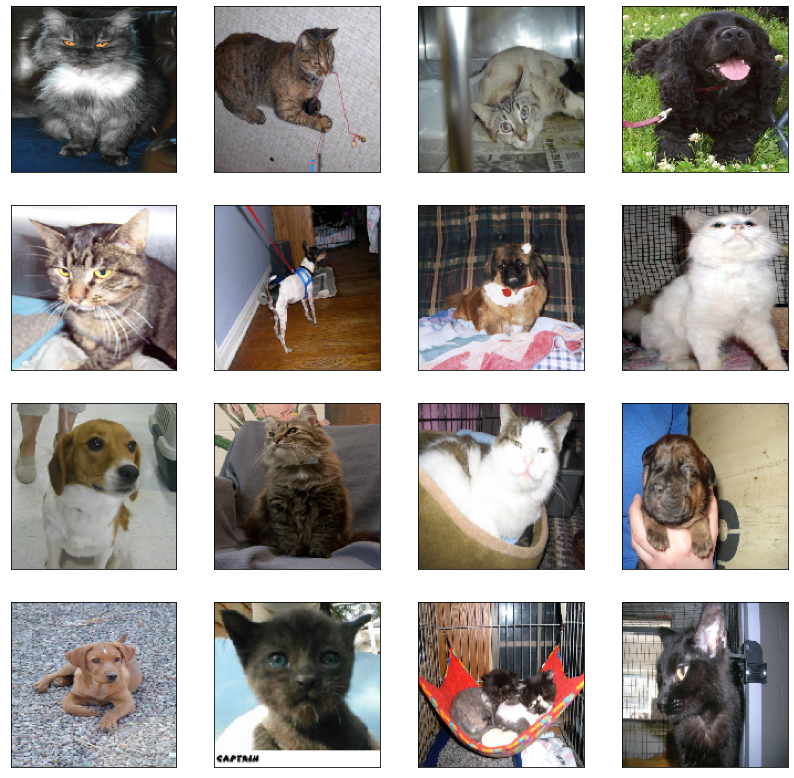

In [19]:
# let's visualize to see all is well

# let's shuffle the visualize set first
indices = np.arange(len(train_visualize)) # 7980
np.random.shuffle(indices)
train_visualize = np.array(train_visualize)
train_visualize = train_visualize[indices]

# to visualize only 16 cute animals
train_visualize = train_visualize[:16]
plt.figure(figsize=(14, 14)) # create a new plot

for i in range(len(train_visualize)):
  plt.subplot(4, 4, i + 1) # plot each image in the each subplot
  
  # remove the axis
  plt.xticks([])
  plt.yticks([])

  image = train_visualize[i]
  image = load_img(image, target_size=(img_height, img_width))
  plt.imshow(image)

plt.show()

In [20]:
# for the validation dataset

val_labels = []
val_images = []

for index, category in enumerate(os.listdir(val_dir)):
  path = os.path.join(val_dir, category)

  for filename in sorted(os.listdir(path)):
    image_fname = os.path.join(path, filename)
    
    # this appends a label of 0 for cats and 1 for dogs
    if category == 'cats':
      val_labels.append(0)
    elif category == 'dogs':
      val_labels.append(1)
    
   
    # load the image and then turn it into an array
    image = load_img(image_fname, color_mode='rgb', target_size=(img_height, img_width))
    image = img_to_array(image)
    val_images.append(image)

In [21]:
len(val_images), len(val_labels)

(1992, 1992)

In [22]:
# for the test dataset

test_labels = []
test_images = []

for index, category in enumerate(os.listdir(test_dir)):
  path = os.path.join(test_dir, category)

  for filename in sorted(os.listdir(path)):
    image_fname = os.path.join(path, filename)
    
    # this appends a label of 0 for cats and 1 for dogs
    if category == 'cats':
      test_labels.append(0)
    elif category == 'dogs':
      test_labels.append(1)
    
   
    # load the image and then turn it into an array
    image = load_img(image_fname, color_mode='rgb', target_size=(img_height, img_width))
    image = img_to_array(image)
    test_images.append(image)

In [23]:
len(test_images), len(test_labels)

(1999, 1999)

In [24]:
# let's convert these to arrays
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [25]:
# let's clip the pixel values in the range 0 - 1 
train_images = train_images[:]/255
val_images = val_images[:]/255
test_images = test_images[:]/255

train_images[1]

array([[[0.3254902 , 0.28235295, 0.26666668],
        [0.21960784, 0.1764706 , 0.16078432],
        [0.21960784, 0.1764706 , 0.16078432],
        ...,
        [0.25882354, 0.22745098, 0.21960784],
        [0.21960784, 0.20392157, 0.20784314],
        [0.3254902 , 0.27058825, 0.26666668]],

       [[0.23529412, 0.19607843, 0.1882353 ],
        [0.1764706 , 0.13725491, 0.12941177],
        [0.2       , 0.16078432, 0.15294118],
        ...,
        [0.34509805, 0.26666668, 0.22352941],
        [0.2627451 , 0.19215687, 0.15294118],
        [0.28235295, 0.21568628, 0.1882353 ]],

       [[0.22352941, 0.2       , 0.20784314],
        [0.19607843, 0.17254902, 0.18039216],
        [0.21960784, 0.19607843, 0.20392157],
        ...,
        [0.4627451 , 0.3529412 , 0.27058825],
        [0.49803922, 0.3764706 , 0.29803923],
        [0.43529412, 0.34509805, 0.2901961 ]],

       ...,

       [[0.6117647 , 0.57254905, 0.5764706 ],
        [0.5019608 , 0.4862745 , 0.5411765 ],
        [0.42745098, 0

In [26]:
train_images.shape

(7987, 150, 150, 3)

### Method B - Using Tensorflow ImageDataGenerator

This is a way faster process and it's easier on memory than method A above. Although, it doesn't make much difference here as the dataset we chose to use for training and validation are quite small. The setback in method A would rise as the size of the dataset increases

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the datagens
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# flow from directory

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), 
                                                    batch_size=20, class_mode='binary', shuffle=True,
                                                    color_mode='rgb', seed=42)

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), 
                                                    batch_size=20, class_mode='binary', shuffle=True,
                                                    color_mode='rgb', seed=42)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), 
                                                    batch_size=20, class_mode='binary', shuffle=True,
                                                    color_mode='rgb', seed=42)


Found 7987 images belonging to 2 classes.
Found 1992 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [28]:
# let's visualize what has happened

# first we need to look into a batch

batch = next(train_generator) # returns a batch of images and labels, batch[0] ==images & batch[1] == labels
img = batch[0][0] # this is the first image
label = batch[1][0] # this is the label of the first image

print('The shape of the image arrays:', batch[0].shape) # shape of the image
print('The shape of each image array:', img.shape)
print('The first image is classified into class:', label)

The shape of the image arrays: (20, 150, 150, 3)
The shape of each image array: (150, 150, 3)
The first image is classified into class: 0.0


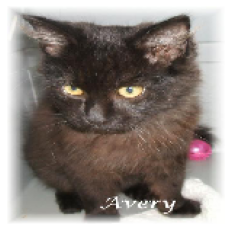

In [29]:
# let's see what the first image is
plt.imshow(img)
plt.axis('off')

plt.show()

0.0


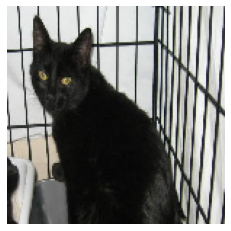

In [30]:
img = batch[0][2] # this is the second image
label = batch[1][2] # this is the label for the second image
print(label)

plt.imshow(img)
plt.axis('off')

plt.show()

We see that Tensorflow's ImageDataGenerator has labeled Images of cats to be 0 and Images of dogs to be 1

## ML Models 

For the baseline model only, we'll use both approaches to training the model. 
For finetuning, we'll use the generators obtained from tensorflow

### Baseline Model

In [31]:
train_images.shape

(7987, 150, 150, 3)

In [32]:
model = models.Sequential(name='baseline_model')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=train_images[0].shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)   

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogs_baseline.h5", save_best_only=True)

In [35]:
history = model.fit(train_images, train_labels, epochs=100, validation_data=(val_images, val_labels), 
          callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
250/250 [==============================] - 23s 41ms/step - loss: 0.6857 - acc: 0.5729 - val_loss: 0.5826 - val_acc: 0.6963
Epoch 2/100
250/250 [==============================] - 9s 36ms/step - loss: 0.5962 - acc: 0.6819 - val_loss: 0.5617 - val_acc: 0.7058
Epoch 3/100
250/250 [==============================] - 9s 38ms/step - loss: 0.5436 - acc: 0.7202 - val_loss: 0.5130 - val_acc: 0.7545
Epoch 4/100
250/250 [==============================] - 8s 33ms/step - loss: 0.5018 - acc: 0.7507 - val_loss: 0.5383 - val_acc: 0.7299
Epoch 5/100
250/250 [==============================] - 9s 37ms/step - loss: 0.4615 - acc: 0.7808 - val_loss: 0.4952 - val_acc: 0.7515
Epoch 6/100
250/250 [==============================] - 9s 36ms/step - loss: 0.4009 - acc: 0.8133 - val_loss: 0.4497 - val_acc: 0.7846
Epoch 7/100
250/250 [==============================] - 8s 33ms/step - loss: 0.3460 - acc: 0.8475 - val_loss: 0.4846 - val_acc: 0.7726
Epoch 8/100
250/250 [==============================] - 8s 33m

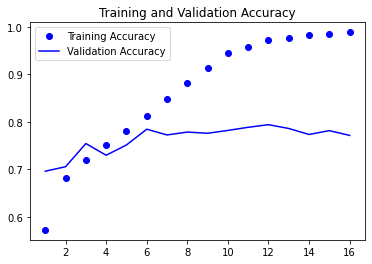

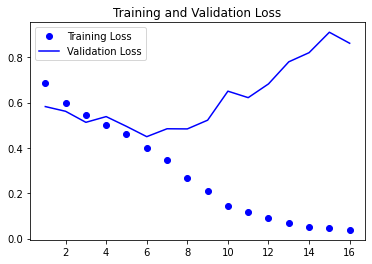

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

From what we observe, we can see that validation loss was lowest at around the 5th epoch and it started rising after. This is a sign of overfitting the train set. We were able to achieve a validaton accuracy of ~ 75%.

#### Evaluating the performance on the test set

In [37]:
loss, acc = model.evaluate(test_images, test_labels)
print('The baseline model reached a', round(acc*100, 2), '% accuracy on the test set')

63/63 [==============================] - 1s 19ms/step - loss: 0.4466 - acc: 0.8019
The baseline model reached a 80.19 % accuracy on the test set


#### On the ImageGenerators

In [38]:
# let's standardize our work by running the model on the imagedatagenerators generated by tensorflow

In [39]:
import gc
del train_images, train_labels

gc.collect()

8315

In [40]:
# again, let's see the model

model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)   

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogsgen_baseline.h5", save_best_only=True)

In [42]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data=val_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 148ms/step - loss: 0.3407 - acc: 0.8495 - val_loss: 0.4686 - val_acc: 0.7960
Epoch 2/30
100/100 [==============================] - 13s 128ms/step - loss: 0.3197 - acc: 0.8705 - val_loss: 0.4930 - val_acc: 0.7900
Epoch 3/30
100/100 [==============================] - 12s 122ms/step - loss: 0.3170 - acc: 0.8675 - val_loss: 0.5210 - val_acc: 0.7760
Epoch 4/30
100/100 [==============================] - 10s 102ms/step - loss: 0.2995 - acc: 0.8710 - val_loss: 0.4465 - val_acc: 0.7940
Epoch 5/30
100/100 [==============================] - 10s 98ms/step - loss: 0.2839 - acc: 0.8800 - val_loss: 0.4988 - val_acc: 0.7840
Epoch 6/30
100/100 [==============================] - 11s 111ms/step - loss: 0.2951 - acc: 0.8712 - val_loss: 0.4988 - val_acc: 0.7910
Epoch 7/30
100/100 [==============================] - 10s 96ms/step - loss: 0.2572 - acc: 0.8910 - val_loss: 0.5426 - val_acc: 0.7710
Epoch 8/30
100/100 [==============================] - 12s

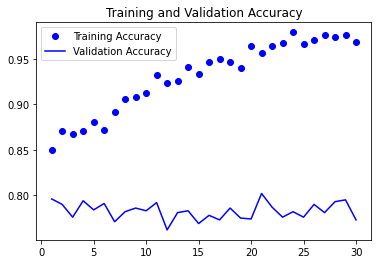

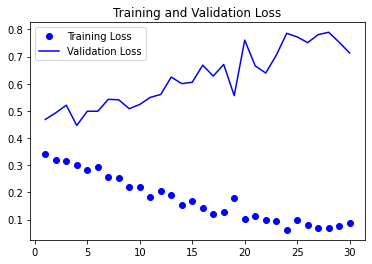

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+ 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label ='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [44]:
loss, acc = model.evaluate(test_generator)
print('The baseline model reached a', round(acc*100, 2), '% accuracy on the test set')

100/100 [==============================] - 7s 71ms/step - loss: 0.7762 - acc: 0.7794
The baseline model reached a 77.94 % accuracy on the test set


### Model 2: Improved Dropout on the baseline Model





In [46]:
shape = (150, 150, 3)

In [47]:
model = models.Sequential(name='baseline_model')
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
early_checkpoint_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogs_2.h5", save_best_only=True)

In [49]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps = 50, callbacks=[early_checkpoint_cb, checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 13s 121ms/step - loss: 0.7720 - acc: 0.4980 - val_loss: 0.6949 - val_acc: 0.5020
Epoch 2/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6907 - acc: 0.5315 - val_loss: 0.6867 - val_acc: 0.4980
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6809 - acc: 0.5785 - val_loss: 0.6687 - val_acc: 0.6310
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 0.6799 - acc: 0.5521 - val_loss: 0.6682 - val_acc: 0.5690
Epoch 5/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6741 - acc: 0.5750 - val_loss: 0.6741 - val_acc: 0.6020
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6812 - acc: 0.5640 - val_loss: 0.6652 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6596 - acc: 0.6090 - val_loss: 0.6294 - val_acc: 0.6400
Epoch 8/30
100/100 [==============================] - 12

In [50]:
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 256)    

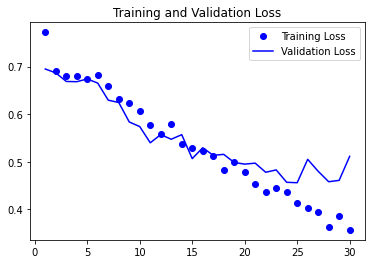

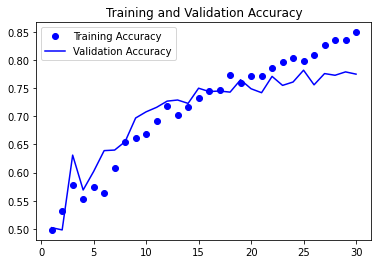

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

This works better than the earlier model and reduces the overfitting to an extent. We added a layer of dropout 0.5 to the model. Let's see how it performs on the test set

In [52]:
loss, acc = model.evaluate(test_generator)
print('The improved model reached a', round(acc*100, 2), '% accuracy on the test set')

100/100 [==============================] - 8s 83ms/step - loss: 0.4982 - acc: 0.7814
The improved model reached a 78.14 % accuracy on the test set


### Model 3:  Data Augmentation

In [53]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,)


# let's do this for every file in the train directory & validation directory
# we do not do this for the test set

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), class_mode='binary',
                                              batch_size = 20, shuffle=True, seed=42, color_mode='rgb')

val_generator = train_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), class_mode='binary',
                                                  batch_size=20, shuffle=True, seed=42, color_mode='rgb')

Found 7987 images belonging to 2 classes.
Found 1992 images belonging to 2 classes.


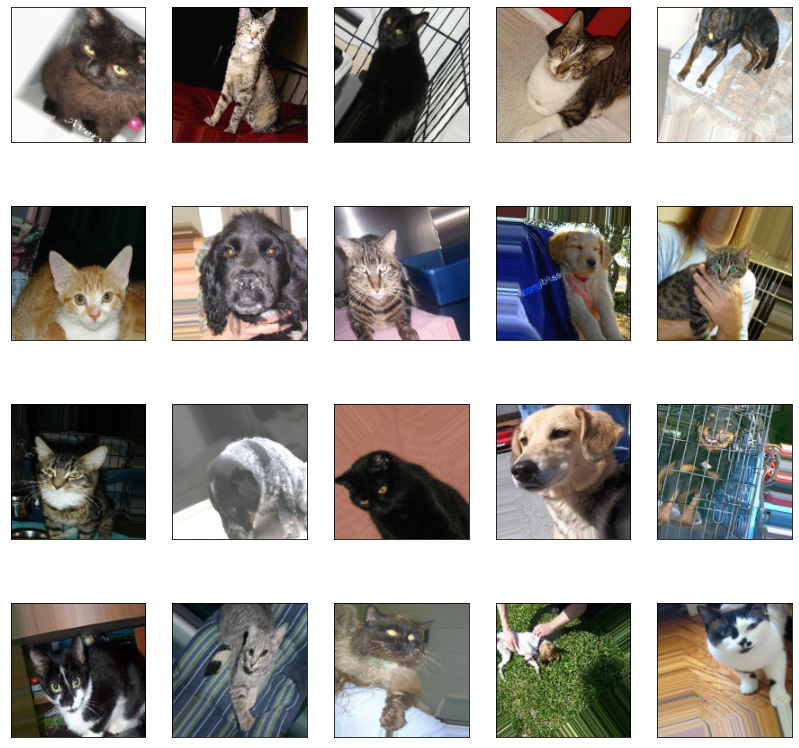

In [54]:
# let's visualize what happened here

batch = next(train_generator) # a batch of images and labels 
images = batch[0]
labels = batch[1]

plt.figure(figsize=(14, 14))
for i in range(20):
  plt.subplot(4, 5, i + 1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(images[i])

plt.show()

In [58]:
model = models.Sequential(name='model_with_data_augmentation')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
early_checkpoint_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogs_3.h5", save_best_only=True)

In [60]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps = 50, callbacks=[early_checkpoint_cb, checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 25s 242ms/step - loss: 0.7204 - acc: 0.5005 - val_loss: 0.6866 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 22s 218ms/step - loss: 0.6881 - acc: 0.5390 - val_loss: 0.6875 - val_acc: 0.5690
Epoch 3/30
100/100 [==============================] - 22s 218ms/step - loss: 0.6865 - acc: 0.5540 - val_loss: 0.6886 - val_acc: 0.5560
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6881 - acc: 0.5315 - val_loss: 0.6846 - val_acc: 0.5830
Epoch 5/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6808 - acc: 0.5642 - val_loss: 0.6775 - val_acc: 0.5760
Epoch 6/30
100/100 [==============================] - 22s 216ms/step - loss: 0.6921 - acc: 0.5491 - val_loss: 0.6808 - val_acc: 0.5860
Epoch 7/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6822 - acc: 0.5740 - val_loss: 0.6761 - val_acc: 0.5610
Epoch 8/30
100/100 [==============================] - 2

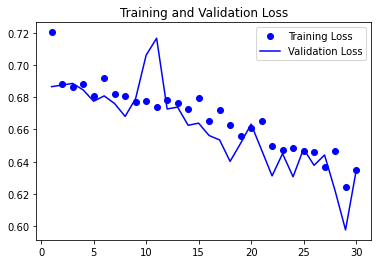

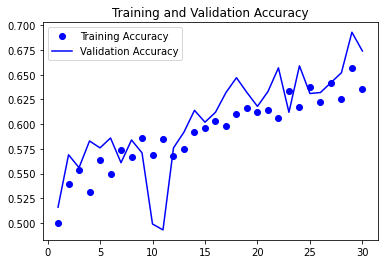

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [62]:
loss, acc = model.evaluate(test_generator)
print('The improved model reached a', round(acc*100, 2), '% accuracy on the test set')

100/100 [==============================] - 7s 73ms/step - loss: 0.6371 - acc: 0.6333
The improved model reached a 63.33 % accuracy on the test set


### Model 4 Using a Pretrained Model

In [63]:
# download the VGG166 pretrained network

from tensorflow.keras.applications import VGG16

# include_top is to remove the dense classifier on top of the vgg16 model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=shape) 

58900480/58889256 [==============================] - 1s 0us/step


In [64]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [65]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [66]:
# freeze the conv_base from being trainable

conv_base.trainable = False

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               2097408   
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
early_checkpoint_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogs_4.h5", save_best_only=True)

The code below will train the model on the image augmentation generators

In [69]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps = 50, callbacks=[early_checkpoint_cb, checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 26s 243ms/step - loss: 0.5542 - acc: 0.7440 - val_loss: 0.3564 - val_acc: 0.8460
Epoch 2/30
100/100 [==============================] - 24s 245ms/step - loss: 0.3821 - acc: 0.8254 - val_loss: 0.3381 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 24s 242ms/step - loss: 0.3612 - acc: 0.8285 - val_loss: 0.3508 - val_acc: 0.8460
Epoch 4/30
100/100 [==============================] - 24s 236ms/step - loss: 0.3458 - acc: 0.8405 - val_loss: 0.3675 - val_acc: 0.8410
Epoch 5/30
100/100 [==============================] - 25s 250ms/step - loss: 0.3359 - acc: 0.8580 - val_loss: 0.3364 - val_acc: 0.8550
Epoch 6/30
100/100 [==============================] - 24s 241ms/step - loss: 0.3344 - acc: 0.8450 - val_loss: 0.3221 - val_acc: 0.8630
Epoch 7/30
100/100 [==============================] - 24s 238ms/step - loss: 0.3352 - acc: 0.8505 - val_loss: 0.3269 - val_acc: 0.8520
Epoch 8/30
100/100 [==============================] - 2

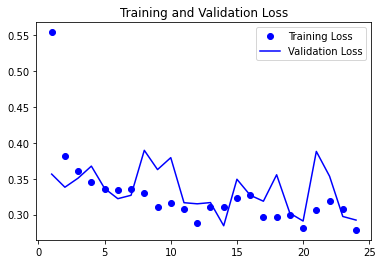

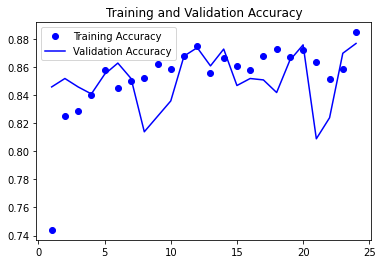

In [70]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

Remarks: Minimal overfitting as seen by the way the curves of the validation loss & accuracy closely tracks those of the traning set. Let's see how it performs on the test set


In [71]:
loss, acc = model.evaluate(test_generator)
print('The improved model reached a', round(acc*100, 2), '% accuracy on the test set')

100/100 [==============================] - 9s 86ms/step - loss: 0.2366 - acc: 0.9005
The improved model reached a 90.05 % accuracy on the test set


### Model 5 - Finetuning a pretrained model results

In [72]:
# let's load the pretrained network again

from tensorflow.keras.applications import VGG16

conv_base = VGG16(include_top=False, weights='imagenet', input_shape=batch[0][0].shape) # batch[0][0] refers to the first image

In [73]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

As seen, we have 14M trainable parameters. Let's freeze some layers so while training, we do not update the learned weights by the VGG16 model

In [74]:
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    conv_base.trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


In [75]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [76]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,732,929
Non-trainable params: 7,079,424
_________________________________________________________________


In [78]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
early_checkpoint_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("catsdogs_5.h5", save_best_only=True)

In [79]:
history = model.fit(train_generator, epochs=30, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps = 50, callbacks=[early_checkpoint_cb, checkpoint_cb])

Epoch 1/30
100/100 [==============================] - 31s 281ms/step - loss: 0.5364 - acc: 0.7255 - val_loss: 0.3411 - val_acc: 0.8610
Epoch 2/30
100/100 [==============================] - 29s 288ms/step - loss: 0.3154 - acc: 0.8671 - val_loss: 0.2504 - val_acc: 0.8860
Epoch 3/30
100/100 [==============================] - 28s 279ms/step - loss: 0.2322 - acc: 0.9090 - val_loss: 0.2075 - val_acc: 0.9170
Epoch 4/30
100/100 [==============================] - 28s 277ms/step - loss: 0.2046 - acc: 0.9185 - val_loss: 0.1892 - val_acc: 0.9210
Epoch 5/30
100/100 [==============================] - 28s 278ms/step - loss: 0.1805 - acc: 0.9220 - val_loss: 0.1752 - val_acc: 0.9240
Epoch 6/30
100/100 [==============================] - 28s 281ms/step - loss: 0.1747 - acc: 0.9285 - val_loss: 0.1549 - val_acc: 0.9440
Epoch 7/30
100/100 [==============================] - 29s 285ms/step - loss: 0.1472 - acc: 0.9405 - val_loss: 0.1472 - val_acc: 0.9420
Epoch 8/30
100/100 [==============================] - 2

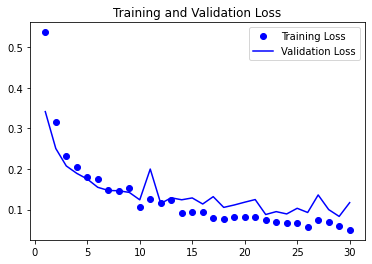

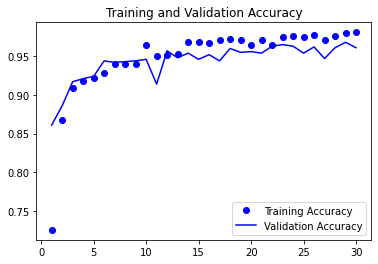

In [80]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [81]:
# let's save the model
model.save('dogscats_final.h5')

In [ ]:
# let's copy the model to google drive

!cp '/content/dogscats_final.h5' '/content/drive/MyDrive'

### EValuating the Performance on Test set

In [82]:
loss, acc = model.evaluate(test_generator)
print('The improved model reached a', round(acc*100, 2), '% accuracy on the test set')

100/100 [==============================] - 7s 74ms/step - loss: 0.0867 - acc: 0.9675
The improved model reached a 96.75 % accuracy on the test set


In [83]:
# let's visualize what has happened

# first shuffle the images

indices = np.arange(test_images.shape[0])
np.random.shuffle(indices)
test_images = test_images[indices]
test_labels = test_labels[indices]

# on 30 animals only

test_images = test_images[:30]
test_labels = test_labels[:30]

In [84]:
predict_proba = model.predict(test_images)

In [85]:
predict_proba = predict_proba.tolist()
predict_proba

[[0.0058884830214083195],
 [0.996027946472168],
 [0.9994632601737976],
 [0.9999818801879883],
 [0.04074936360120773],
 [1.192511263070628e-05],
 [0.000332380150211975],
 [0.9991636276245117],
 [0.998543381690979],
 [0.9998470544815063],
 [2.3440044969902374e-05],
 [0.003982215188443661],
 [1.0],
 [4.763448941957904e-06],
 [0.000987041275948286],
 [5.974839223199524e-05],
 [5.00968235428445e-06],
 [0.0010686935856938362],
 [0.9999468326568604],
 [7.16200929673505e-07],
 [8.707651772965619e-07],
 [0.9999274015426636],
 [0.993294894695282],
 [0.0002844398550223559],
 [0.9960287809371948],
 [0.9993721842765808],
 [0.022842301055788994],
 [7.566294243588345e-06],
 [0.9704188108444214],
 [0.003873945912346244]]

In [86]:
predict_proba_flat = [item for sublist in predict_proba for item in sublist]
predict_proba_flat

[0.0058884830214083195,
 0.996027946472168,
 0.9994632601737976,
 0.9999818801879883,
 0.04074936360120773,
 1.192511263070628e-05,
 0.000332380150211975,
 0.9991636276245117,
 0.998543381690979,
 0.9998470544815063,
 2.3440044969902374e-05,
 0.003982215188443661,
 1.0,
 4.763448941957904e-06,
 0.000987041275948286,
 5.974839223199524e-05,
 5.00968235428445e-06,
 0.0010686935856938362,
 0.9999468326568604,
 7.16200929673505e-07,
 8.707651772965619e-07,
 0.9999274015426636,
 0.993294894695282,
 0.0002844398550223559,
 0.9960287809371948,
 0.9993721842765808,
 0.022842301055788994,
 7.566294243588345e-06,
 0.9704188108444214,
 0.003873945912346244]

In [87]:
len(predict_proba_flat)

30

In [88]:
prediction = []

for i in predict_proba_flat:
  i * 100
  if i < 0.5:
    prediction.append(0)
  else:
    prediction.append(1)
prediction

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0]

In [89]:
# Remember 0 for cats and 1 for dogs

animal_dict = {0: 'cat', 1: 'dog'}
animal_dict

{0: 'cat', 1: 'dog'}

In [90]:
# let's see what the model predicted for the images

predicted_animal = []
for index, val in enumerate(prediction):
  for key, value in animal_dict.items():
    if key == val:
      predicted_animal.append(value)

predicted_animal

['cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat']

In [91]:
# for the actual animal type

actual_animal = []

for index, val in enumerate(prediction):
  for key, value in animal_dict.items():
    if key == test_labels[index]:
      actual_animal.append(value)
actual_animal

['cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat']

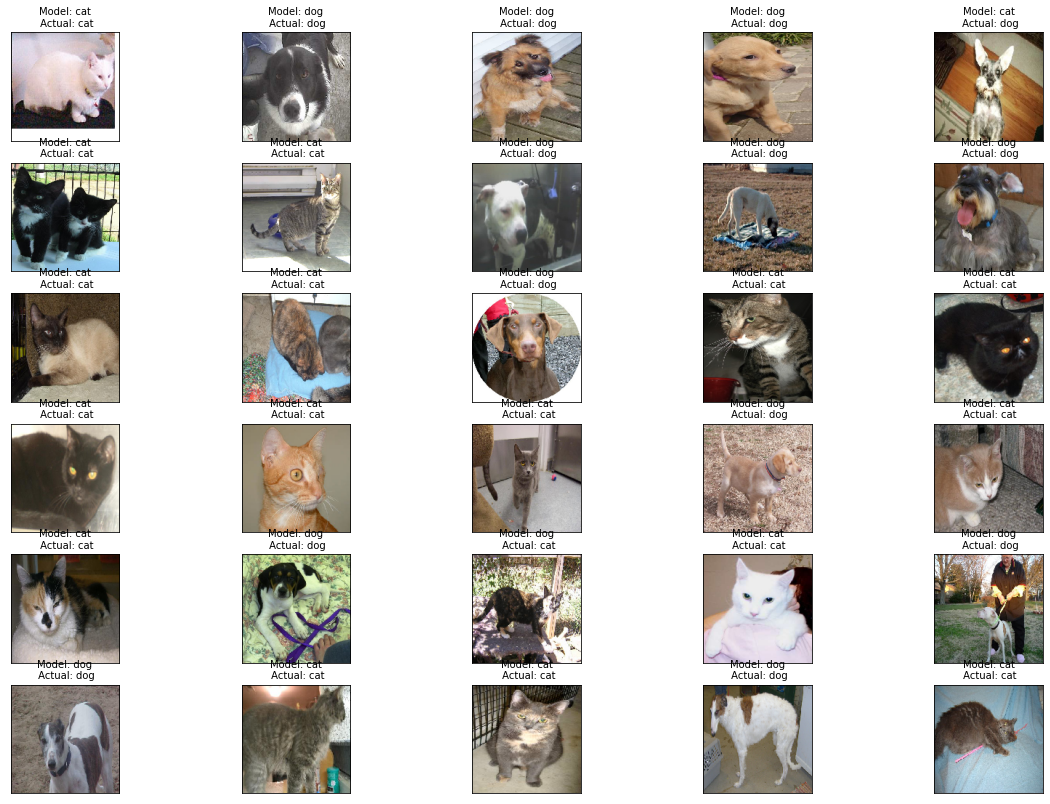

In [94]:
# let's plot for these images

plt.figure(figsize=(20,14))

for i in range(len(prediction)):
  plt.subplot(6, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.title(f'Model: {predicted_animal[i]}\n Actual: {actual_animal[i]}', fontsize=10)
  image = test_images[i]
  plt.imshow(image)

 

plt.show()

### Evaluate Function

In [112]:
def evaluate(image_path, model_path, image_height=150, image_width=150, n_channels=3):
    """Function for a python script to determine if an image is either a cat or a dog.
    Imports the necessary dependencies for the function to work anywhere.
    Args:
        image_path - path to the jpg file of either a cat or a dog.
        model_path - path to the h5 model file
        image_height/width - required shape for image. defaults to 150
        n_channels - 3 for rgb. 1 for black & white
    """
    # import dependencies
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from tensorflow import keras
    from keras import models
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # load the model
    model = models.load_model(model_path)

    # preprocess the image
    image = load_img(image_path, target_size=(image_height, image_width))

    # plot the image
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # convert image to array & clip to 0-1 range
    image = img_to_array(image)
    image = np.array(image)
    image = image[:]/255
    image = np.expand_dims(image, axis=0)

    # feed image to model & predict
    predict_proba = model.predict([image])

    # translate for use
    if predict_proba < 0.5:
        print("Model's Prediction: This is a cat.")
    else:
        print("Model's Prediction: This is a dog.")

In [103]:
model_path = '/content/dogscats_final.h5'

Model's Prediction: This is a dog.


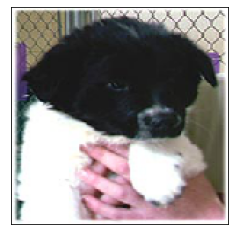

In [113]:
image_path = '/content/cats_and_dogs/PetImages/Dog/dog_10897.jpg'

evaluate(image_path, model_path)

Model's Prediction: This is a cat.


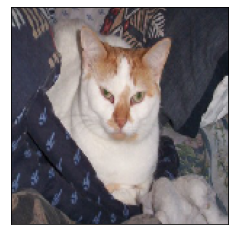

In [114]:
image_path = '/content/cats_and_dogs/PetImages/Cat/cat_10897.jpg'
evaluate(image_path, model_path)

All Done

In [116]:
# let's copy the required saved model to Google Drive

!cp '/content/dogscats_final.h5' '/content/drive/MyDrive/ML_Models'